# Análise dos Bilionários da Forbes em 2023

Bem-vindo à análise abrangente dos bilionários listados pela Forbes em 2023. Neste trabalho, exploramos os dados detalhados sobre os indivíduos mais ricos do mundo, buscando insights sobre suas fortunas, origens, idades e a distribuição global da riqueza. Os dados foram extraídos da Forbes, uma fonte confiável e renomada para classificar as pessoas mais ricas do planeta.

## Objetivo da Análise

O principal objetivo desta análise é proporcionar uma compreensão aprofundada do panorama dos bilionários em 2023. Buscamos responder a perguntas específicas, como quem são os 10 bilionários mais ricos, qual é a distribuição de idades, qual é a nacionalidade predominante, se existe correlação entre idade e fortuna, e quais são as principais fontes de riqueza representadas nesta lista.

## Fonte dos Dados

Os dados foram obtidos a partir do conjunto de dados fornecido pelo kaggle, detalhando informações cruciais, como classificação, nome, patrimônio líquido, idade, origem e país de cada bilionário listado.

## Estrutura do Trabalho

O notebook está organizado em seções lógicas, cada uma focada em uma pergunta específica. Em cada seção, realizamos tratamento de dados, visualizações gráficas e análises estatísticas para extrair insights significativos.

Vamos iniciar nossa jornada exploratória pelos dados dos bilionários de 2023 e desvendar os padrões e tendências que podem estar por trás das fortunas mais impressionantes do mundo.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Billionaires.xlsx')
df.head()

,Rank,Name,Net Worth,Change,Age,Source,Country/Territory
0,1,Bernard Arnault & family,$232.2 B,$0M | 0.00%,74.0,LVMH,France
1,2,Elon Musk,$184.7 B,$0M | 0.00%,51.0,"Tesla, SpaceX",United States
2,3,Jeff Bezos,$139.1 B,$0M | 0.00%,59.0,Amazon,United States
3,4,Larry Ellison,$127.8 B,$0M | 0.00%,78.0,Oracle,United States
4,5,Warren Buffett,$116.3 B,$0M | 0.00%,92.0,Berkshire Hathaway,United States


### Tratamento dos dados

In [3]:
traducoes = {
    'Rank': 'Classificacao',
    'Name': 'Nome',
    'Net Worth': 'Patrimonio_Liquido',
    'Change': 'Variaçao',
    'Age': 'Idade',
    'Source': 'Origem',
    'Country/Territory': 'Pais_Territorio'
}
df.rename(columns=traducoes, inplace= True)

Como não vamos utilizar a coluna de variação, vamos removê-la

In [4]:
df.drop(columns='Variaçao', axis= 1, inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Classificacao       500 non-null    int64  
 1   Nome                500 non-null    object 
 2   Patrimonio_Liquido  500 non-null    object 
 3   Idade               493 non-null    float64
 4   Origem              500 non-null    object 
 5   Pais_Territorio     500 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB


Na coluna 'Idade', existem alguns valores ausentes.

In [6]:
df[df['Idade'].isnull()]

,Classificacao,Nome,Patrimonio_Liquido,Idade,Origem,Pais_Territorio
100,101,Karl Albrecht Jr. & family,$16.4 B,NaN,Supermarkets,Germany
101,102,Beate Heister,$16.4 B,NaN,Supermarkets,Germany
244,245,Francine von Finck & family,$8.4 B,NaN,Investments,Germany
424,425,Douglas Leone,$6.2 B,NaN,Venture capital,United States
448,449,Zhou Qunfei,$5.9 B,NaN,Smartphone screens,Hong Kong
473,474,Vinod Khosla,$5.6 B,NaN,Venture capital,United States
487,488,Marcos Galperin,$5.5 B,NaN,E-commerce,Argentina


In [7]:
#Através de uma breve pesquisa, consegui identificar os valores ausentes na coluna 'Idades'.
idades = [75, 72, 55, 66, 53, 68, 51]
indices_nulos = df[df['Idade'].isnull()].index
df.loc[indices_nulos, 'Idade'] = idades

In [8]:
df[df['Idade'].isnull()]

,Classificacao,Nome,Patrimonio_Liquido,Idade,Origem,Pais_Territorio


In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Classificacao       500 non-null    int64  
 1   Nome                500 non-null    object 
 2   Patrimonio_Liquido  500 non-null    object 
 3   Idade               500 non-null    float64
 4   Origem              500 non-null    object 
 5   Pais_Territorio     500 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB


,Classificacao,Nome,Patrimonio_Liquido,Idade,Origem,Pais_Territorio
0,1,Bernard Arnault & family,$232.2 B,74.0,LVMH,France
1,2,Elon Musk,$184.7 B,51.0,"Tesla, SpaceX",United States
2,3,Jeff Bezos,$139.1 B,59.0,Amazon,United States
3,4,Larry Ellison,$127.8 B,78.0,Oracle,United States
4,5,Warren Buffett,$116.3 B,92.0,Berkshire Hathaway,United States


Realizando a conversão de 'object' para 'float'.

In [10]:
# Aqui, estamos convertendo a coluna 'Patrimonio_Liquido' para float, removendo caracteres não numéricos,
# para garantir que possamos realizar operações numéricas posteriormente.
df['Patrimonio_Liquido'] = df['Patrimonio_Liquido'].apply(lambda x:x.replace('$', '')).apply(lambda x:x.replace('B','')).astype(float)
df['Idade'] = df['Idade'].astype(int)

In [11]:
df.head()

,Classificacao,Nome,Patrimonio_Liquido,Idade,Origem,Pais_Territorio
0,1,Bernard Arnault & family,232.2,74,LVMH,France
1,2,Elon Musk,184.7,51,"Tesla, SpaceX",United States
2,3,Jeff Bezos,139.1,59,Amazon,United States
3,4,Larry Ellison,127.8,78,Oracle,United States
4,5,Warren Buffett,116.3,92,Berkshire Hathaway,United States


O nosso DataFrame está pronto para abordar algumas questões.

### A primeira pergunta que abordaremos é: quem são os 10 bilionários mais ricos de 2023?

In [12]:
sort = df[['Nome','Patrimonio_Liquido']][:10].sort_values(by='Patrimonio_Liquido',ascending=True)
sort.sort_values(by='Patrimonio_Liquido', ascending = False)

,Nome,Patrimonio_Liquido
0,Bernard Arnault & family,232.2
1,Elon Musk,184.7
2,Jeff Bezos,139.1
3,Larry Ellison,127.8
4,Warren Buffett,116.3
5,Bill Gates,114.3
6,Larry Page,104.2
7,Sergey Brin,99.1
8,Steve Ballmer,98.4
9,Carlos Slim Helu & family,97.3


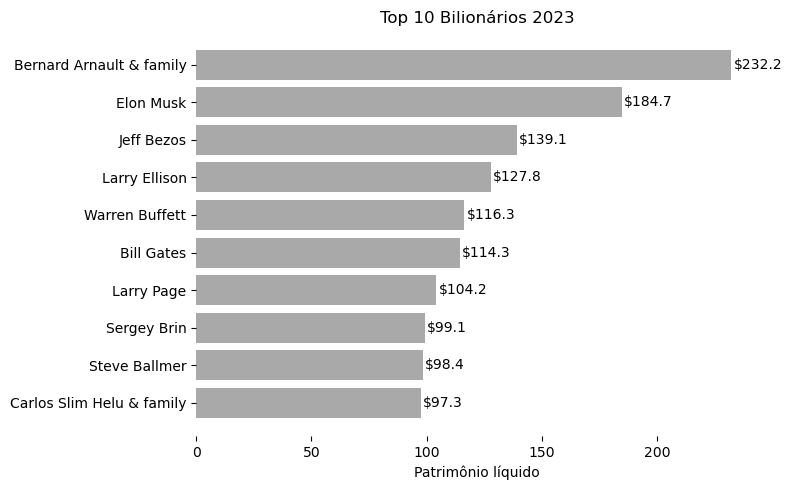

In [13]:
def autolabel(grupos):
    for i in grupos:
        width = i.get_width()  
        plt.text(width + 1, i.get_y() + i.get_height()/2, f'${width}',  
                 va='center', ha='left', color='black', fontsize=10)
        
fig, ax = plt.subplots(figsize=(8,5))
plt.barh(sort['Nome'], sort['Patrimonio_Liquido'],color='#A9A9A9')
ax.set_title('Top 10 Bilionários 2023')
ax.set_xlabel('Patrimônio líquido')
[s.set_visible(False) for s in ax.spines.values()]
plt.grid(False)
autolabel(plt.gca().patches)
plt.tight_layout()

Esta análise nos fornece uma visão clara dos bilionários mais ricos em 2023, com Bernard Arnault & family liderando a lista com um patrimônio líquido impressionante de $232.2 bilhões, seguido por Elon Musk e Jeff Bezos. A diferença entre o primeiro e o último colocado é notável, o que destaca a disparidade de riqueza entre os bilionários mais ricos do mundo.

### Qual é a distribuição de idades dos bilionários nesta lista?

In [14]:
df.Idade.describe()

count    500.00000
mean      67.62400
std       13.52392
min       31.00000
25%       58.00000
50%       68.00000
75%       77.00000
max       99.00000
Name: Idade, dtype: float64

Text(0.5, 0, 'Idades')

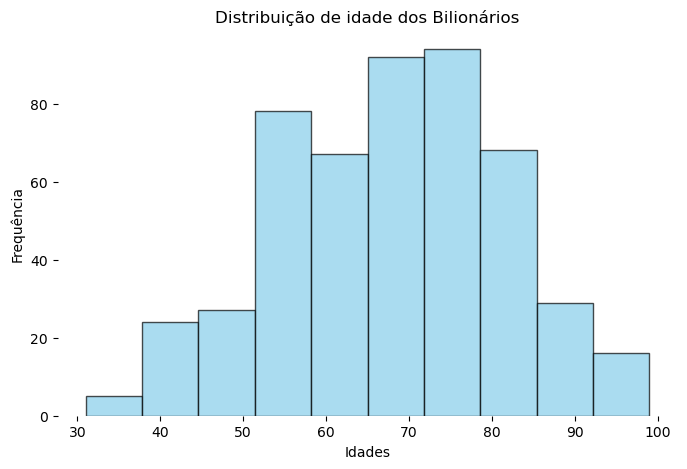

In [15]:
fig, ax2 = plt.subplots(figsize=(8,5))
plt.hist(df.Idade, color='skyblue', edgecolor='black', alpha=0.7)
ax2.set_title('Distribuição de idade dos Bilionários')
[s.set_visible(False) for s in ax2.spines.values()]
plt.grid(False)
ax2.set_ylabel('Frequência')
ax2.set_xlabel('Idades')

Em resumo, nossas estatísticas indicam que a idade dos bilionários no conjunto de dados varia consideravelmente, com uma média em torno dos 67.6 anos. A maioria dos bilionários está na faixa entre 58 e 77 anos, com o bilionário mais jovem tendo 31 anos e o mais velho 99 anos.

### Qual é a nacionalidade predominante entre os bilionários nesta lista?

In [16]:
b_pais = df.groupby('Pais_Territorio').size().sort_values(ascending=False)
b_pais = b_pais.to_frame()
b_pais = b_pais[:10]
b_pais = b_pais.sort_values(by= 0, ascending = True)

In [17]:
b_pais.head(10).sort_values(by = 0, ascending = False)

,0
Pais_Territorio,
United States,180
China,58
Germany,26
Russia,24
India,23
France,18
Hong Kong,17
United Kingdom,12
Switzerland,11


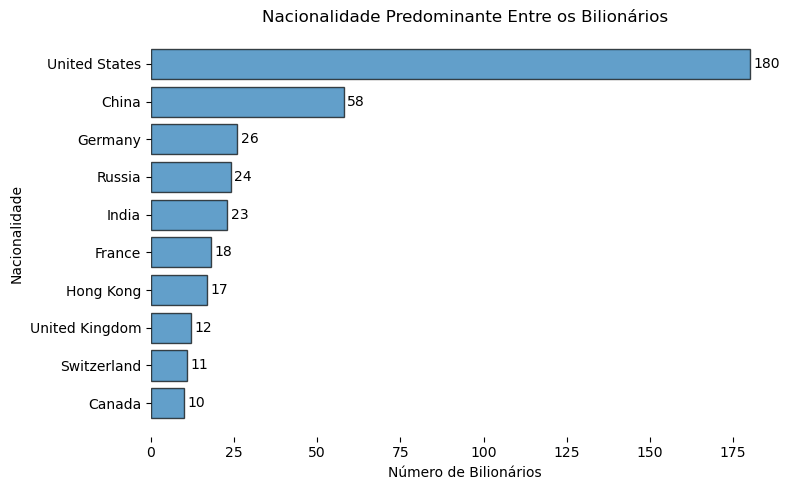

In [18]:
def autolabel2(grupos):
    for i in grupos:
        width = i.get_width()  
        plt.text(width + 1, i.get_y() + i.get_height()/2, f'{width}',  
                 va='center', ha='left', color='black', fontsize=10)
fig, ax3 = plt.subplots(figsize=(8,5))
plt.barh(b_pais.index,b_pais[0],edgecolor='black', alpha=0.7)
[s.set_visible(False) for s in ax3.spines.values()]
plt.grid(False)
ax3.set_title('Nacionalidade Predominante Entre os Bilionários')
ax3.set_ylabel('Nacionalidade')
ax3.set_xlabel('Número de Bilionários')
autolabel2(plt.gca().patches)
plt.tight_layout()

Com base na minha análise, os Estados Unidos lideram com uma quantidade significativamente maior de bilionários, totalizando 180. Em segundo lugar, está a China com 58 bilionários, seguida pela Alemanha com 26. Esses dados indicam uma clara disparidade na distribuição de bilionários ao redor do mundo, com os Estados Unidos ocupando uma posição de destaque.

### Existe alguma correlação entre a idade dos bilionários e a sua fortuna?

In [19]:
np.corrcoef(df.Idade, df.Patrimonio_Liquido)

array([[1.      , 0.024261],
       [0.024261, 1.      ]])

Text(0, 0.5, 'Patrimônio Líquido (Bilhões de Dólares)')

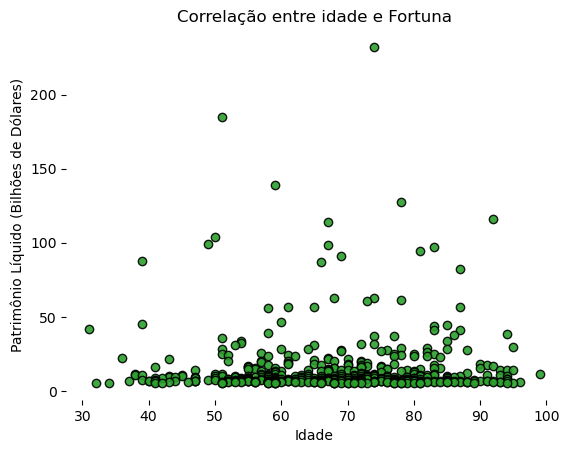

In [20]:
fig, ax4 = plt.subplots()
plt.scatter(x=df['Idade'], y=df['Patrimonio_Liquido'],color ='#2ca02c', edgecolor='black', alpha=0.9)
[s.set_visible(False) for s in ax4.spines.values()]
plt.grid(False)
ax4.set_title('Correlação entre idade e Fortuna')
ax4.set_xlabel('Idade')
ax4.set_ylabel('Patrimônio Líquido (Bilhões de Dólares)')

A análise da correlação entre a idade dos bilionários e o seu patrimônio líquido revelou um coeficiente de correlação extremamente baixo, de aproximadamente 0.024. Esse valor sugere que, na amostra analisada, não existe uma correlação linear significativa entre a idade e a fortuna dos bilionários. É importante ressaltar que correlação não implica causalidade. Ou seja, outros fatores podem influenciar a fortuna de um bilionário, além da idade.

### Qual é a fonte de riqueza mais comum entre os bilionários nesta lista?

In [21]:
df['Origem'] = df['Origem'].str.lower()
df_copy = df.copy()
df_copy['Origem'] = df_copy['Origem'].str.split(', ')
df_copy = df_copy.explode('Origem')

quantidade = df_copy['Origem'].value_counts()
print(f'quantidade de origem de riquezas: {quantidade.index.nunique()}')
quantidade = quantidade[:10]
quantidade = quantidade.to_frame()
quantidade
quantidade = quantidade.sort_values(by='count')

quantidade.sort_values(by='count', ascending = False)


quantidade de origem de riquezas: 226


,count
Origem,
investments,41
real estate,40
hedge funds,17
diversified,15
pharmaceuticals,14
banking,12
shipping,11
private equity,11
oil,11


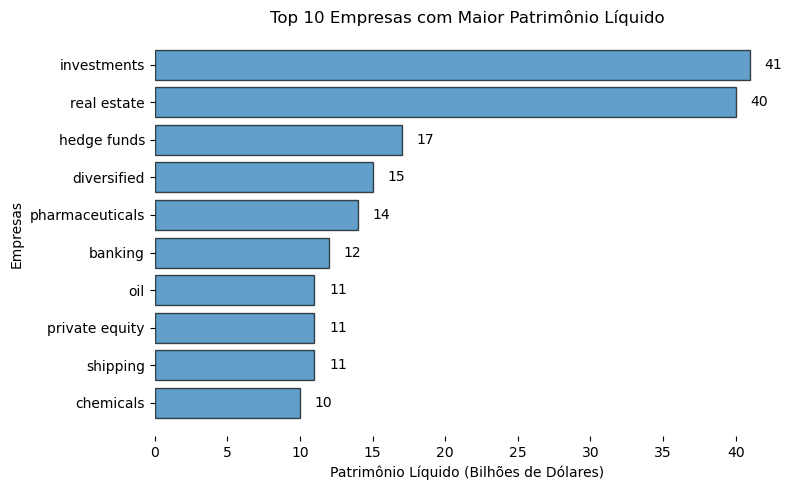

In [22]:
fig, ax4 = plt.subplots(figsize=(8,5))
plt.barh(quantidade.index[:10], quantidade['count'][:10], edgecolor='black', alpha=0.7)

ax4.set_title('Países com mais Bilionários')
[s.set_visible(False) for s in ax4.spines.values()]
plt.grid(False)
ax4.set_title('Top 10 Empresas com Maior Patrimônio Líquido')
ax4.set_xlabel('Patrimônio Líquido (Bilhões de Dólares)')
ax4.set_ylabel('Empresas')
plt.tight_layout()
autolabel2(plt.gca().patches)

A análise dos dados revela que o setor de investimentos desponta como a fonte de riqueza mais comum entre os bilionários desta lista, contabilizando um impressionante total de 41 indivíduos. Em um cenário quase igualmente proeminente, o setor imobiliário, representado pela categoria 'Real estate', não fica muito atrás, com um total de 40 bilionários. Esses dados demonstram a forte influência e lucratividade desses dois setores na formação de riqueza entre os indivíduos mais abastados.

### Qual é o total do patrimônio líquido acumulado das cinco maiores origens?

In [23]:
tot_origem = df_copy.groupby('Origem')['Patrimonio_Liquido'].sum().sort_values(ascending=False)
tot_origem = tot_origem.to_frame()
tot_origem = tot_origem[:5].sort_values(by = 'Patrimonio_Liquido', ascending=True)
tot_origem.sort_values(by='Patrimonio_Liquido').sort_values(by='Patrimonio_Liquido', ascending = False)

,Patrimonio_Liquido
Origem,
real estate,385.2
investments,368.0
google,242.6
walmart,236.4
diversified,235.0


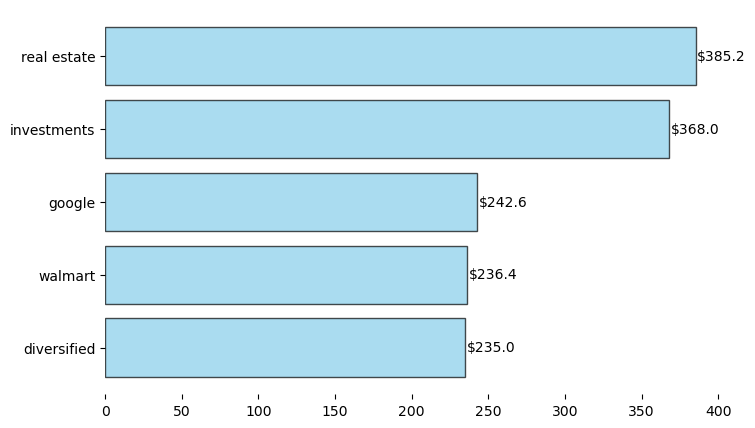

In [31]:
fig, ax5 = plt.subplots(figsize=(8,5))
plt.barh(tot_origem.index, tot_origem['Patrimonio_Liquido'], edgecolor='black', alpha = 0.7, color='skyblue')
[s.set_visible(False) for s in ax5.spines.values()]
plt.grid(False)
ax4.set_title('Top 10 Empresas com Maior Patrimônio Líquido')
ax4.set_xlabel('Patrimônio Líquido (Bilhões de Dólares)')
autolabel(plt.gca().patches)

Aqui estão os cinco setores com os maiores patrimônios líquidos acumulados:

1. **Real Estate (Setor Imobiliário):** Com um notável total de \$385.2 bilhões, o setor imobiliário lidera a lista. Esta indústria mostra a força do investimento em propriedades e desenvolvimento imobiliário.

2. **Investimentos:** Seguindo de perto, o setor de investimentos apresenta um impressionante total de \$368 bilhões. Isso reflete a diversidade de oportunidades e estratégias de investimento disponíveis.

3. **Google (Tecnologia):** Demonstrando a influência da tecnologia, o gigante Google contribui com um considerável \$242.6 bilhões. Isso destaca o valor dos serviços e produtos tecnológicos em nosso mundo moderno.

4. **Walmart (Varejo):** A gigante do varejo, Walmart, possui um patrimônio líquido de \$236.4 bilhões. Isso sublinha a importância do setor varejista na economia global.

5. **Diversificado:** Com um patrimônio líquido de \$235 bilhões, o setor diversificado representa uma variedade de negócios e estratégias. Isso ilustra como a diversificação pode ser uma estratégia eficaz para acumular riqueza.

Esses números refletem não apenas os sucessos individuais desses setores, mas também oferecem insights sobre as diferentes facetas da economia global e as oportunidades que eles oferecem.


In [32]:
df.head()

,Classificacao,Nome,Patrimonio_Liquido,Idade,Origem,Pais_Territorio
0,1,Bernard Arnault & family,232.2,74,lvmh,France
1,2,Elon Musk,184.7,51,"tesla, spacex",United States
2,3,Jeff Bezos,139.1,59,amazon,United States
3,4,Larry Ellison,127.8,78,oracle,United States
4,5,Warren Buffett,116.3,92,berkshire hathaway,United States


In [41]:
df.loc[df['Pais_Territorio'] == 'Brazil']

,Classificacao,Nome,Patrimonio_Liquido,Idade,Origem,Pais_Territorio
93,94,Vicky Safra & family,17.3,70,banking,Brazil
103,104,Eduardo Saverin,16.2,41,facebook,Brazil
108,109,Jorge Paulo Lemann & family,15.6,83,beer,Brazil
167,168,Marcel Herrmann Telles,10.5,73,beer,Brazil
231,232,Carlos Alberto Sicupira & family,8.6,75,beer,Brazil
445,446,Alexandre Behring,5.9,56,investments,Brazil
447,448,Andre Esteves,5.9,54,banking,Brazil


Text(0.5, 24.5, 'Patrimônio Líquido (Bilhões de Dólares)')

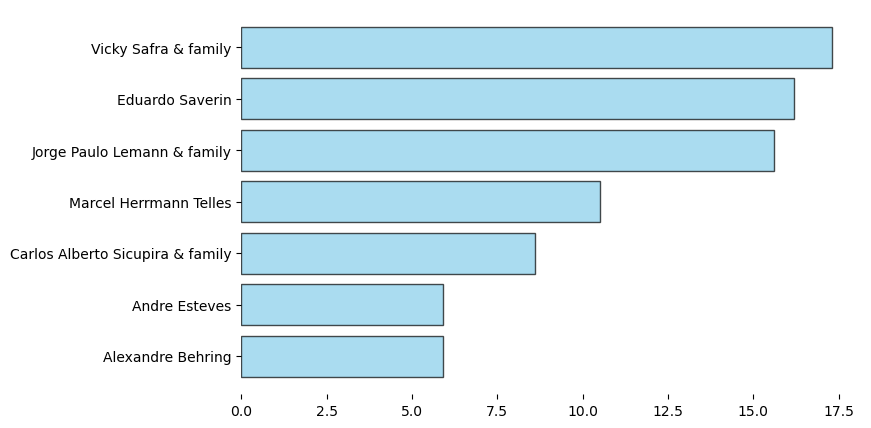

In [39]:

pais_brasil = pais_brasil.sort_values(by= 'Patrimonio_Liquido')
fig, ax5 = plt.subplots(figsize=(8,5))
plt.barh(pais_brasil['Nome'], pais_brasil['Patrimonio_Liquido'], edgecolor='black', alpha = 0.7, color='skyblue')
[s.set_visible(False) for s in ax5.spines.values()]
plt.grid(False)
ax4.set_title('Top 10 Empresas com Maior Patrimônio Líquido')
ax4.set_xlabel('Patrimônio Líquido (Bilhões de Dólares)')
#autolabel(plt.gca().patches)